In [111]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

1
     Unnamed: 0  day  factor  required  delivery  percents  num_vehicle  \
0             0    2       2     20.16     20.16    100.00            2   
1             0    3       2      6.50      6.50    100.00            3   
2             0    4       2    219.60    191.55     87.23           15   
3             0    5       2    279.44    254.30     91.00           18   
4             0    6       2    183.38    179.63     97.96           12   
..          ...  ...     ...       ...       ...       ...          ...   
331           0  333       2    383.26    221.16     57.70           26   
332           0  334       2      5.40      5.40    100.00            1   
333           0  335       2      5.40      5.40    100.00            1   
334           0  336       2      5.40      5.40    100.00            1   
335           0  337       2     52.20     52.20    100.00            4   

     carbon_emission(kg)  
0               4.261609  
1               1.320265  
2              4

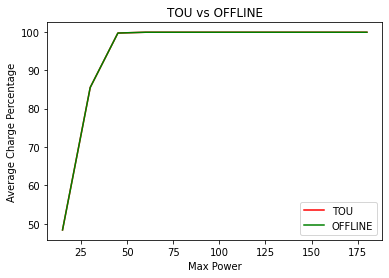

In [122]:
# Typical Charger draws around 7.5 KW
sample_step = 15
max_power = int(180)
num_of_samples = int(180 / sample_step)

num_vehicle_ub = 100000
num_vehicle_lb = 40

tou_df = np.zeros(num_of_samples,dtype=object)
offline_df = np.zeros(num_of_samples,dtype=object)
tou_percent_mean = np.zeros(num_of_samples,dtype=object)
offline_percent_mean = np.zeros(num_of_samples,dtype=object)
tou_emission_mean = np.zeros(num_of_samples,dtype=object)
offline_emission_mean = np.zeros(num_of_samples,dtype=object)

power = np.arange(sample_step, max_power+1, sample_step, dtype=int)

for i in range(1,num_of_samples+1,1):
    print(i)
    tou_df[i-1] = pd.read_csv('gurobisolver/TOU_P{}.0.csv'.format(i*sample_step))
    offline_df[i-1] = pd.read_csv('gurobisolver/offline_P{}.csv'.format(i*sample_step))
    df = tou_df[i-1]
    df2 = offline_df[i-1]
    print(df)
    print(df2)
    tou_percent_mean[i-1] = df[(df.num_vehicle < num_vehicle_ub) & 
                               (df.num_vehicle > num_vehicle_lb)].percents.mean()
    tou_emission_mean[i-1] = df[(df.num_vehicle < num_vehicle_ub) & 
                                (df.num_vehicle > num_vehicle_lb)]['carbon_emission(kg)'].mean()
    
    offline_percent_mean[i-1] = df2[(df2.num_vehicle < num_vehicle_ub) & 
                               (df2.num_vehicle > num_vehicle_lb)].percents.mean()
    offline_emission_mean[i-1] = df2[(df2.num_vehicle < num_vehicle_ub) & 
                                (df2.num_vehicle > num_vehicle_lb)]['carbon_emission(kg)'].mean()
    
#print(df)
#print(df2)
    
plt.plot(power,tou_percent_mean, color='r', label='TOU')
plt.plot(power,offline_percent_mean, color='g', label='OFFLINE')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Max Power")
plt.ylabel("Average Charge Percentage")
plt.title("TOU vs OFFLINE")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

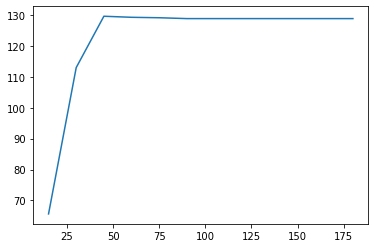

In [120]:
plt.plot(power,tou_emission_mean)

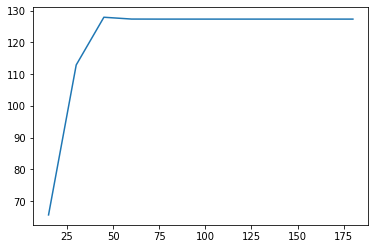

In [121]:
plt.plot(power,offline_emission_mean)

In [92]:
print(df)

     Unnamed: 0  day  factor  required  delivery  percents  num_vehicle  \
0             0    2       2     20.16     20.16     100.0            2   
1             0    3       2      6.50      6.50     100.0            3   
2             0    4       2    219.60    219.60     100.0           15   
3             0    5       2    279.44    279.44     100.0           18   
4             0    6       2    183.38    183.38     100.0           12   
..          ...  ...     ...       ...       ...       ...          ...   
331           0  333       2    383.26    375.58      98.0           26   
332           0  334       2      5.40      5.40     100.0            1   
333           0  335       2      5.40      5.40     100.0            1   
334           0  336       2      5.40      5.40     100.0            1   
335           0  337       2     52.20     52.20     100.0            4   

     carbon_emission(kg)  
0               4.261609  
1               1.320265  
2              54.